In [1]:
pip install ucimlrepo

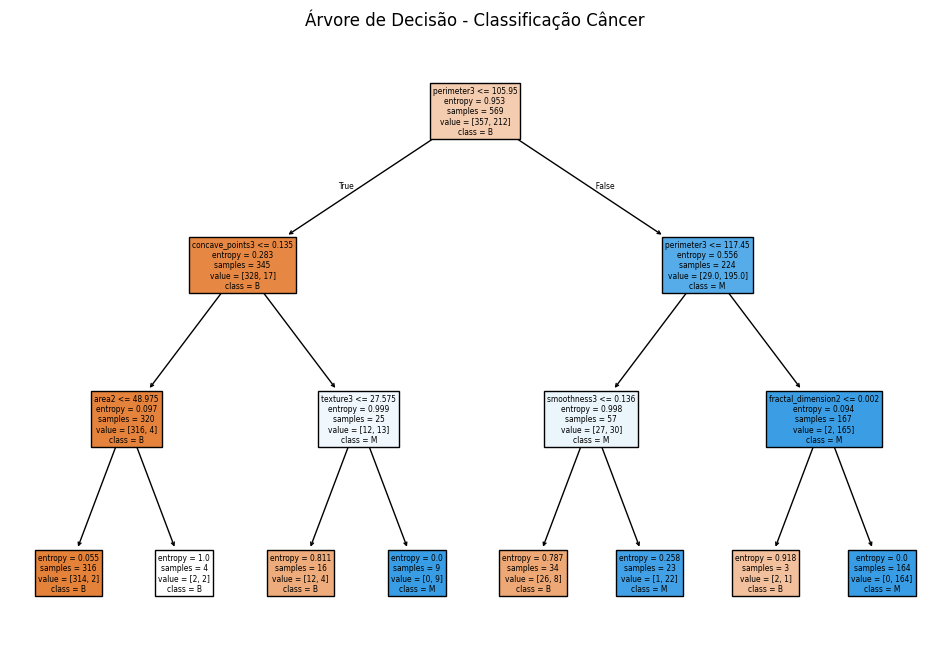

Regras da Árvore de Decisão (com nomes das classes):
|--- perimeter3 <= 105.95
|   |--- concave_points3 <= 0.14
|   |   |--- area2 <= 48.98
|   |   |   |--- class: B
|   |   |--- area2 >  48.98
|   |   |   |--- class: B
|   |--- concave_points3 >  0.14
|   |   |--- texture3 <= 27.58
|   |   |   |--- class: B
|   |   |--- texture3 >  27.58
|   |   |   |--- class: M
|--- perimeter3 >  105.95
|   |--- perimeter3 <= 117.45
|   |   |--- smoothness3 <= 0.14
|   |   |   |--- class: B
|   |   |--- smoothness3 >  0.14
|   |   |   |--- class: M
|   |--- perimeter3 >  117.45
|   |   |--- fractal_dimension2 <= 0.00
|   |   |   |--- class: B
|   |   |--- fractal_dimension2 >  0.00
|   |   |   |--- class: M



In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.ravel())

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y_encoded)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=label_encoder.classes_,
               filled=True)
plt.title("Árvore de Decisão - Classificação Câncer")
plt.show()

regras = export_text(clf, feature_names=list(X.columns))

regras_decodificadas = regras
for i, classe in enumerate(label_encoder.classes_):
    regras_decodificadas = regras_decodificadas.replace(f'class: {i}', f'class: {classe}')

print("Regras da Árvore de Decisão (com nomes das classes):")
print(regras_decodificadas)
